In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
adult_census = pd.read_csv("data/adult-census.csv")

In [170]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [171]:
target_column = 'class'
adult_census[target_column].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [172]:
numerical_columns = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]
adult_census = adult_census[all_columns]
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education-num   48842 non-null  int64 
 2   capital-gain    48842 non-null  int64 
 3   capital-loss    48842 non-null  int64 
 4   hours-per-week  48842 non-null  int64 
 5   workclass       48842 non-null  object
 6   education       48842 non-null  object
 7   marital-status  48842 non-null  object
 8   occupation      48842 non-null  object
 9   relationship    48842 non-null  object
 10  race            48842 non-null  object
 11  sex             48842 non-null  object
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [173]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [174]:
adult_census.shape

(48842, 14)

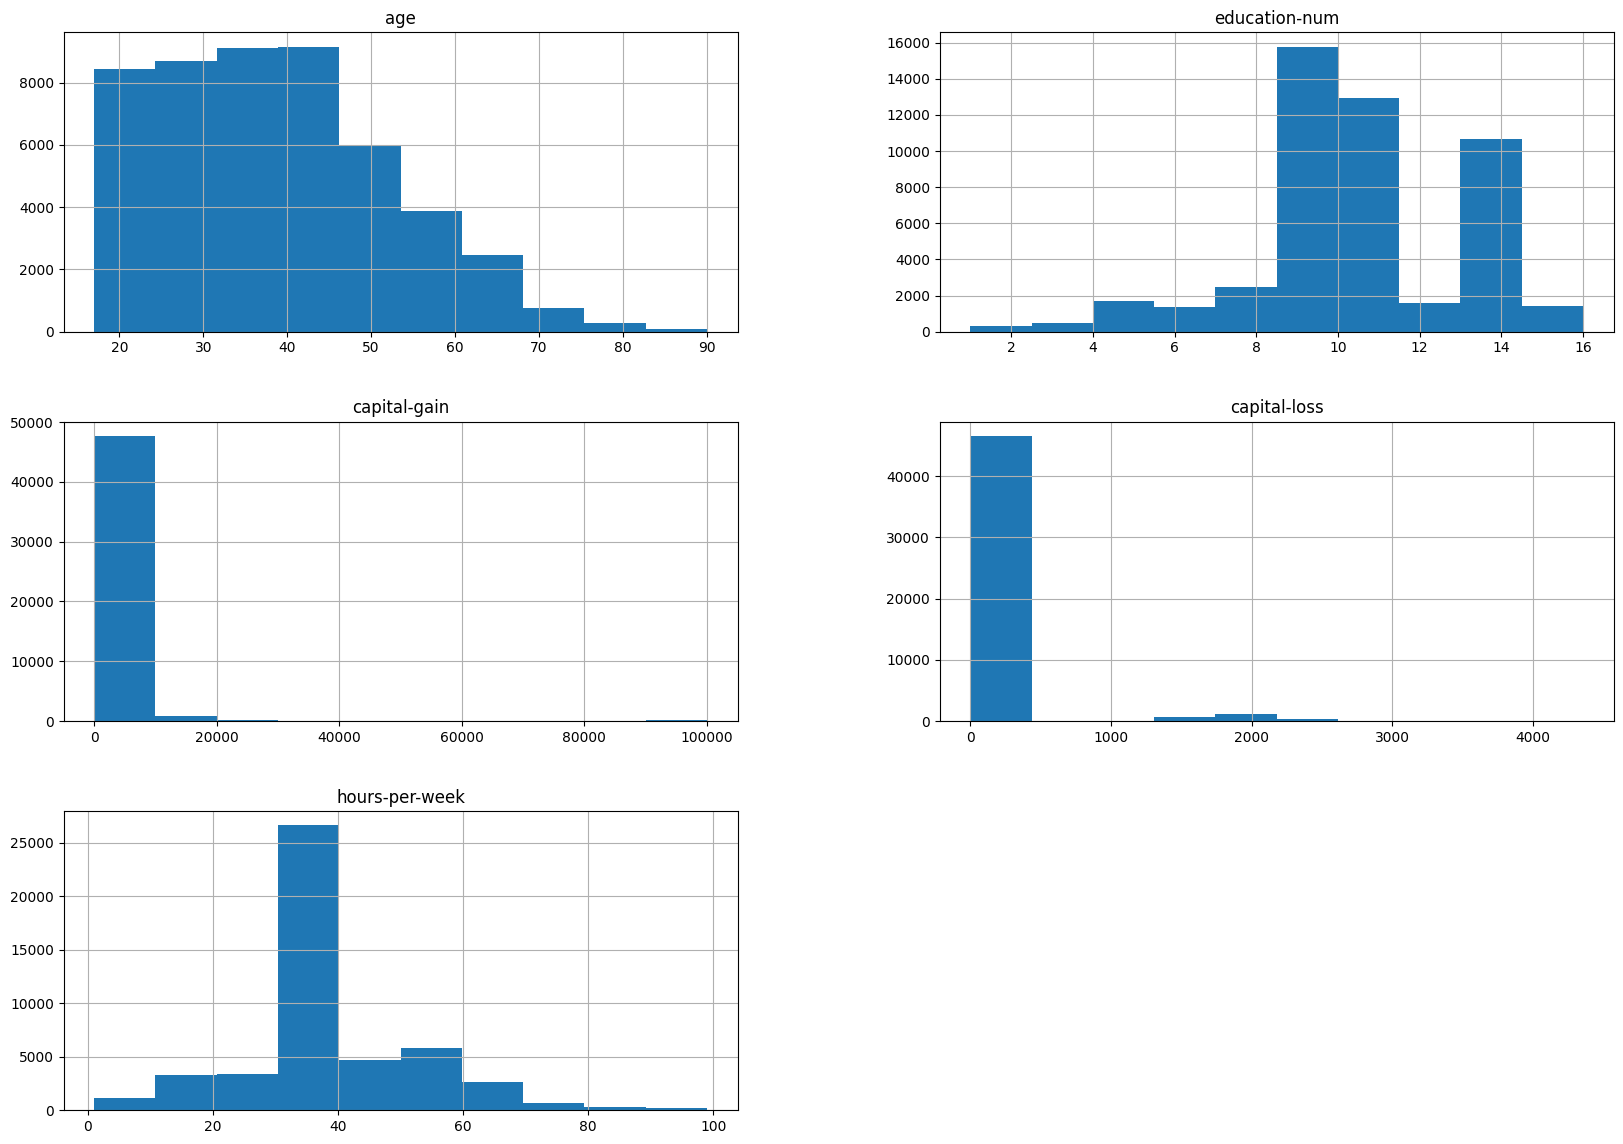

In [175]:
_ = adult_census.hist(figsize=(20, 14))

In [176]:
adult_census['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [177]:
pd.crosstab(
    index=adult_census['education'],
    columns=adult_census['education-num']
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


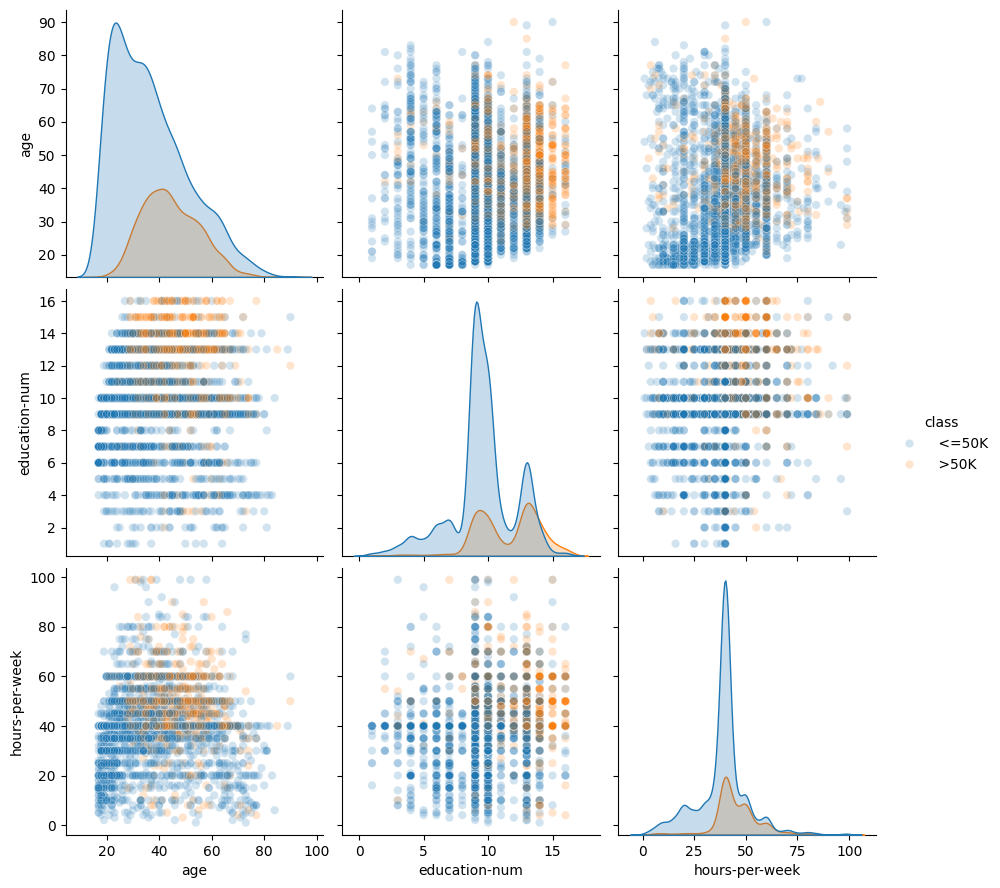

In [180]:
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
sns.pairplot(
    data = adult_census[:n_samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws={'alpha': 0.2},
    height=3,
    diag_kind='kde'
)
plt.savefig('adult_census_pair.png')

<Axes: xlabel='age', ylabel='hours-per-week'>

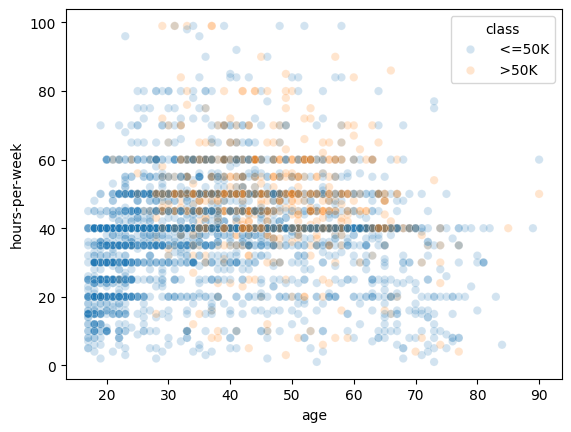

In [178]:
sns.scatterplot(
    x='age',
    y='hours-per-week',
    hue=target_column,
    data=adult_census[:n_samples_to_plot],
    alpha=0.2
)

Text(55, 70, '???')

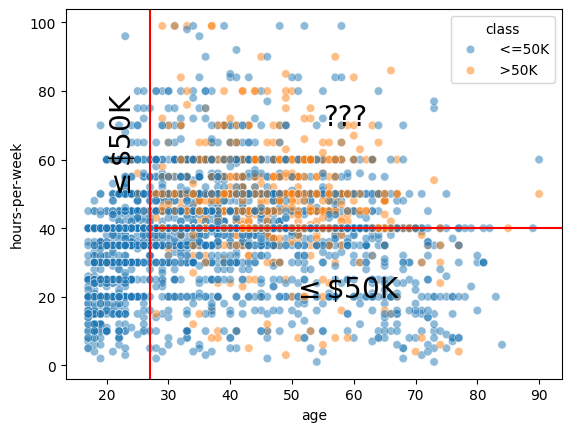

In [13]:
ax = sns.scatterplot(
    x='age',
    y='hours-per-week',
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color='red')

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color='red')

plt.text(20, 50, r'$\leq \$50\text{K}$', rotation=90, fontsize=20)
plt.text(50, 20, r'$\leq \$50\text{K}$', fontsize=20)
plt.text(55, 70, '???', fontsize=20)

In [14]:
import pandas as pd
penguins = pd.read_csv('data/penguins_classification.csv')
penguins.sample(5)

,Culmen Length (mm),Culmen Depth (mm),Species
68,41.8,19.4,Adelie
67,35.9,16.6,Adelie
172,45.1,14.5,Gentoo
223,48.2,15.6,Gentoo
191,42.7,13.7,Gentoo


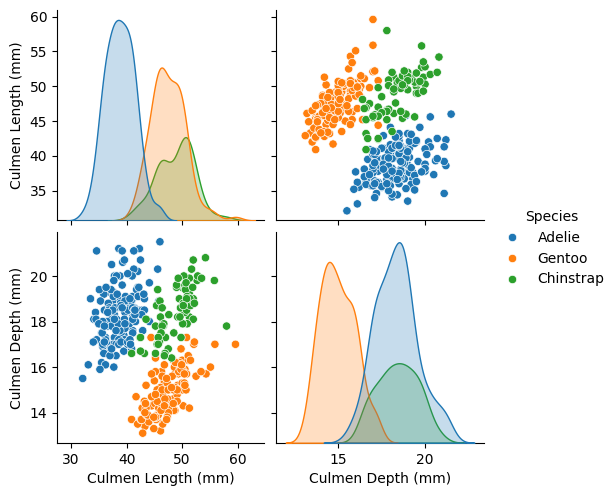

In [15]:
import seaborn as sns
g = sns.pairplot(penguins, hue='Species')

In [16]:
adult_census = pd.read_csv('data/adult-census-numeric.csv')

target_name = 'class'
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [17]:
data = adult_census.drop(columns=[target_name])
data.sample(5)

,age,capital-gain,capital-loss,hours-per-week
17427,35,0,0,60
8464,51,0,0,50
11895,34,0,0,40
14427,38,0,0,24
16087,24,0,0,36


In [18]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [19]:
data.shape

(39073, 4)

In [20]:
print(f"The dataset has {data.shape[0]} records and {data.shape[1]} features.")

The dataset has 39073 records and 4 features.


In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
_ = model.fit(data, target)

In [22]:
target_predicted = model.predict(data)
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [23]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [24]:
sum(target == target_predicted) / len(target)

0.8238169580016892

In [25]:
(target == target_predicted).mean()

np.float64(0.8238169580016892)

In [26]:
adult_census_test = pd.read_csv('data/adult-census-numeric-test.csv')

In [27]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

In [28]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__
print(f'The test accuracy using {model_name} is {accuracy:.3f}')

The test accuracy using KNeighborsClassifier is 0.807


In [29]:
model_name

'KNeighborsClassifier'

In [30]:
data[:10]

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40
5,57,0,0,72
6,22,0,0,35
7,55,27828,0,55
8,45,0,0,40
9,36,0,0,50


In [31]:
adult_census = pd.read_csv("data/adult-census.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]
data_numeric = data[numerical_columns]

In [32]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42
)

In [33]:
data_train.shape

(36631, 4)

In [34]:
data_test.shape

(12211, 4)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)

,copy,True
,with_mean,True
,with_std,True


In [36]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [37]:
scaler.scale_

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [38]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled[:5]

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       [ 1.26462212, -0.14450843, -0.22025127, -0.03471139],
       [ 2.35747364, -0.14450843, -0.22025127, -3.09336116]])

In [39]:
scaler2 = StandardScaler().set_output(transform='pandas')
data_train_scaled2 = scaler2.fit_transform(data_train)
data_train_scaled2.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.246208e-16,1.823347e-17,-4.422586e-17,1.788432e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


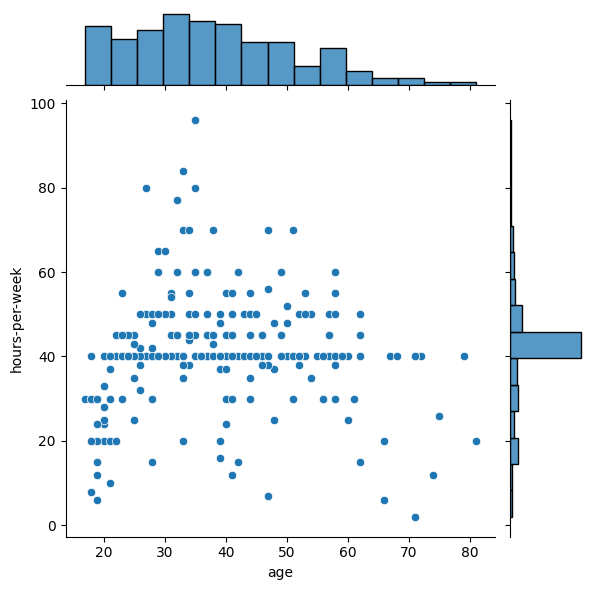

In [40]:
num_points_to_plot = 300

sns.jointplot(
    data=data_train[:num_points_to_plot],
    x='age',
    y='hours-per-week',
    marginal_kws=dict(bins=15)
)

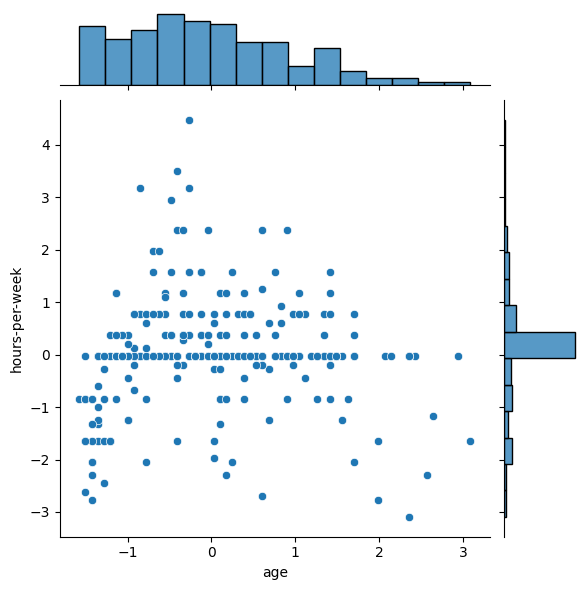

In [41]:
sns.jointplot(
    data=data_train_scaled2[:num_points_to_plot],
    x='age',
    y='hours-per-week',
    marginal_kws=dict(bins=15)
)

In [42]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(StandardScaler(), LogisticRegression())
model3

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [43]:
model3.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [44]:
start = time.time()
model3.fit(data_train, target_train)
elasped_time = time.time() - start

In [45]:
predicted_target = model3.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [46]:
model3_name = model3.__class__.__name__
score = model3.score(data_test, target_test)
print(f"{model3_name}'s accuracy is {score:.3f}")
print(f"{model3[-1].n_iter_[0]}")

Pipeline's accuracy is 0.807
9


In [47]:
adult_census = pd.read_csv("data/adult-census.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)
numerical_columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]
data_numeric = data[numerical_columns]

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model5 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [49]:
%%time
from sklearn.model_selection import cross_validate

cv_result = cross_validate(model5, data_numeric, target, cv=5)
cv_result

CPU times: total: 62.5 ms
Wall time: 371 ms


{'fit_time': array([0.05490017, 0.05810761, 0.05820966, 0.05261707, 0.05280614]),
 'score_time': array([0.00918436, 0.00926089, 0.01055145, 0.01080918, 0.01079607]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80456593])}

In [50]:
scores = cv_result['test_score']
print(f"The mean score is {scores.mean():.3f} with variation of {scores.std():.3f}")

The mean score is 0.800 with variation of 0.003


In [51]:
adult_census = pd.read_csv("data/adult-census.csv")
# drop the duplicated column `"education-num"` as stated in the first notebook
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

In [52]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [53]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [54]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [55]:
data_categorical = data[categorical_columns]

In [56]:
education_column = data[['education']]
type(education_column)

pandas.core.frame.DataFrame

In [57]:
from sklearn.preprocessing import OrdinalEncoder

# Note the double square brackets to extract data into df (instead of Series)
education_column = data[['education']]

encoder = OrdinalEncoder().set_output(transform='pandas')
education_encoded = encoder.fit_transform(education_column)
education_encoded

,education
0,1.0
1,11.0
2,7.0
3,15.0
4,15.0
...,...
48837,7.0
48838,11.0
48839,11.0
48840,11.0


In [58]:
df = pd.concat([education_column, education_encoded], axis=1)
df.sample(5)

,education,education
16628,Assoc-voc,8.0
2945,Bachelors,9.0
7284,Some-college,15.0
33290,HS-grad,11.0
1253,12th,2.0


In [59]:
encoder.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [60]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,4.0,1.0,4.0,7.0,3.0,2.0,1.0,39.0
1,4.0,11.0,2.0,5.0,0.0,4.0,1.0,39.0
2,2.0,7.0,2.0,11.0,0.0,4.0,1.0,39.0
3,4.0,15.0,2.0,7.0,0.0,2.0,1.0,39.0
4,0.0,15.0,4.0,0.0,3.0,4.0,0.0,39.0
...,...,...,...,...,...,...,...,...
48837,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0
48838,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0
48839,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0
48840,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0


In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder2 = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
education_encoded2 = encoder2.fit_transform(education_column)
df2 = pd.concat([education_column, education_encoded2], axis=1)
df2.sample(5)

,education,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
35262,Bachelors,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38857,7th-8th,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30789,HS-grad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18506,Bachelors,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28988,HS-grad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
data_encoded2 = encoder2.fit_transform(data_categorical)
data_encoded2.sample(5)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
13838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16564,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11315,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
data_encoded2.shape

(48842, 102)

In [64]:
model6 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(max_iter=500)
)

In [65]:
cv_result_cat = cross_validate(model6, data_categorical, target)
cv_result_cat

{'fit_time': array([0.20297456, 0.20209455, 0.19183683, 0.16668773, 0.14037347]),
 'score_time': array([0.02300167, 0.01803327, 0.01678514, 0.01487041, 0.0138371 ]),
 'test_score': array([0.83232675, 0.83570478, 0.82831695, 0.83292383, 0.83497133])}

In [66]:
scores = cv_result_cat['test_score']
print(f"{scores.mean():.3f} and {scores.std():.3f}")

0.833 and 0.003


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [68]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       48842 non-null  object
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   sex             48842 non-null  object
 7   native-country  48842 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


In [69]:
model8 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression()
)


In [70]:
cv_result_oh = cross_validate(model8, data_categorical, target)

In [71]:

scores_oh = cv_result_oh['test_score'].mean()
scores_oh

np.float64(0.8328487299031877)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [74]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)


In [76]:
numerical_columns

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [77]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

In [78]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('one-hot-encoder', categorical_preprocessor, categorical_columns),
        ('standard-scaler', numerical_preprocessor, numerical_columns)
    ]
)

In [79]:
preprocessor

,transformers,"[('one-hot-encoder', ...), ('standard-scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model9 = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=500)
)

In [81]:
model9

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('one-hot-encoder', ...), ('standard-scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [82]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

In [83]:
model9.fit(data_train, target_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('one-hot-encoder', ...), ('standard-scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [84]:
data_test[:5]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,56,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
23881,25,Private,HS-grad,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States
30507,43,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States
28911,32,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
19484,39,Private,Bachelors,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States


In [85]:
model9.predict(data_test[:5])

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

In [86]:
target_test[:5]

7762      <=50K
23881     <=50K
30507      >50K
28911     <=50K
19484     <=50K
Name: class, dtype: object

In [87]:
model9.score(data_test, target_test)

0.8575055278028008

In [90]:
from sklearn.model_selection import cross_validate

cv_results_all = cross_validate(model9, data, target, cv=5)
cv_results_all['test_score'].mean()

np.float64(0.8514803215540241)

In [92]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor2 = OrdinalEncoder(
    handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor2 = ColumnTransformer(
    [('categorical', categorical_preprocessor2, categorical_columns)],
    remainder='passthrough'
)

model10 = make_pipeline(preprocessor2, HistGradientBoostingClassifier())

In [93]:
model10

,steps,"[('columntransformer', ...), ('histgradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [94]:
%%time
model10.fit(data_train, target_train)

CPU times: total: 1.22 s
Wall time: 2.8 s


,steps,"[('columntransformer', ...), ('histgradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [96]:
model10.score(data_test, target_test)

0.8792891655065105

In [99]:
start = time.time()
cv_model10 = cross_validate(model10, data, target)
elasped_time = time.time() - start

scores_model10 = cv_model10['test_score']
print(f"Model 10: {scores_model10.mean():.3f} ± {scores_model10.std():.3f} with time: {elasped_time:.3f}")

Model 10: 0.873 ± 0.003 with time: 2.338


In [102]:
ames_housing = pd.read_csv("data/house_prices.csv", na_values="?")
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
target_name = 'SalePrice'
data, target = (
    ames_housing.drop(columns=target_name),
    ames_housing[target_name]
)
target = (target > 200_000).astype(int)

In [105]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [106]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: SalePrice, dtype: int64

In [107]:
numeric_features = ['LotArea', 'FullBath', 'HalfBath']
categorical_features = ['Neighborhood', 'HouseStyle']
data = data[numeric_features + categorical_features]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   FullBath      1460 non-null   int64 
 2   HalfBath      1460 non-null   int64 
 3   Neighborhood  1460 non-null   object
 4   HouseStyle    1460 non-null   object
dtypes: int64(3), object(2)
memory usage: 57.2+ KB


## The differences between `Pipeline` and `make_pipeline`

Both functions eventually give you the same `sklear.pipeline.Pipeline` object. `make_pipeline` is for quick analysis/minimal typing, while `Piepline` is more formal (especially when names matter).

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [113]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [115]:
from sklearn.linear_model import LogisticRegression

model_ames = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)
model_ames

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
cv_ames = cross_validate(model_ames, data, target, cv=5)
scores_ames = cv_ames['test_score']
print(
    "The mean cross-validation accuracy is: "
    f"{scores_ames.mean():.3f} ± {scores_ames.std():.3f}"
)

The mean cross-validation accuracy is: 0.859 ± 0.018


In [121]:
import pandas as pd
ames_housing = pd.read_csv("data/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]
target = (target > 200_000).astype(int)


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [124]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [126]:
len(numerical_columns)

36

In [132]:
data['OverallCond'].dtype

dtype('int64')

In [141]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data2 = data[numerical_features]

In [142]:
model14 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

cv_model14 = cross_validate(model14, data2, target, cv=10)
model14_score = cv_model14['test_score']
model14_score.mean()


np.float64(0.8924657534246576)

In [137]:
data_numerical = data[numerical_features]

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results_num = cross_validate(model, data_numerical, target, cv=10)
test_score_num = cv_results_num["test_score"]
test_score_num.mean()

np.float64(0.8924657534246576)

In [151]:
num_set = set(numerical_features)
cat_features = [c for c in data.columns if c not in num_set]
cat_features


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [153]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, cat_features)
    ]
)
model15 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]
)

cv_model15 = cross_validate(model15, data, target, cv=14)
model15_score = cv_model15['test_score']
model15_score.mean()

np.float64(0.9177655677655678)

In [155]:
from sklearn.compose import make_column_transformer
categorical_features = data.columns.difference(numerical_features)

categorical_processor = OneHotEncoder(handle_unknown="ignore")
numerical_processor = StandardScaler()

preprocessor = make_column_transformer(
    (categorical_processor, categorical_features),
    (numerical_processor, numerical_features),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=1_000))
cv_results_all = cross_validate(model, data, target, cv=10)
test_score_all = cv_results_all["test_score"]
test_score_all.mean()

np.float64(0.9164383561643834)

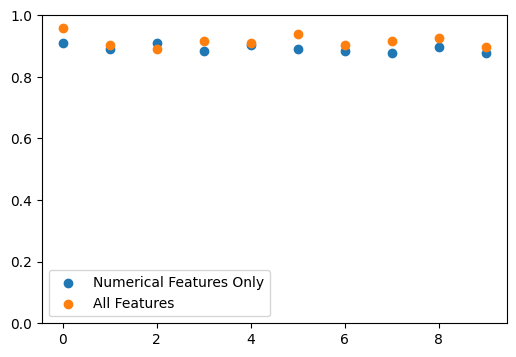

In [166]:
indices = np.arange(len(test_score_num))
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(indices, test_score_num, label="Numerical Features Only")
ax.scatter(indices, test_score_all, label="All Features")
ax.set_ylim(0.0, 1.0)
ax.legend()